Choosing the right type of training
is crucial to getting our machine learning algorithms to converge to a solution.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [10]:
batch_size = 25
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(mean=0,stddev = 1, shape=[1,1]))

In [11]:
init = tf.global_variables_initializer()

In [12]:
my_output = tf.add(x_data, A)
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = my_output, labels = y_target))
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [13]:
writer = tf.summary.FileWriter('/home/user/Downloads/assign1/',tf.get_default_graph())
with tf.Session() as sess:
    sess.run(init)
    for i in range(1800):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = [x_vals_train[rand_index]]
        rand_y = [y_vals_train[rand_index]]
        sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
        if (i+1)%200==0:
            print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
            print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))
writer.close()

Step #200 A = [[-0.34807763]]
Loss = 0.23675789
Step #400 A = [[-0.6386132]]
Loss = 0.24307184
Step #600 A = [[-0.71523136]]
Loss = 0.2625436
Step #800 A = [[-0.7385519]]
Loss = 0.34131977
Step #1000 A = [[-0.773998]]
Loss = 0.28105515
Step #1200 A = [[-0.74330765]]
Loss = 0.26145747
Step #1400 A = [[-0.73267394]]
Loss = 0.23221295
Step #1600 A = [[-0.67637235]]
Loss = 0.25222817
Step #1800 A = [[-0.70436305]]
Loss = 0.30160922


In [14]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data,A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [15]:
with tf.Session() as sess:
    sess.run(init)
    acc_value_test = sess.run(accuracy, feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
    acc_value_train = sess.run(accuracy, feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
    print('Accuracy on train set: ' + str(acc_value_train))
    print('Accuracy on test set: ' + str(acc_value_test))

Accuracy on train set: 0.675
Accuracy on test set: 0.9


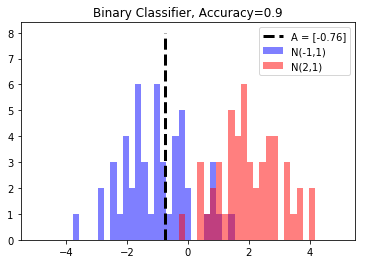

In [16]:
with tf.Session() as sess:
    sess.run(init) 
    
    A_result = sess.run(A)
    A_result = A_result.reshape(1)
    bins = np.linspace(-5, 5, 50)
    plt.hist(x_vals[0:50], bins, alpha=0.5, label='N(-1,1)',color='blue')
    plt.hist(x_vals[50:100], bins[0:50], alpha=0.5, label='N(2,1)',color='red')
    plt.plot((A_result, A_result), (0, 8), 'k--', linewidth=3,label='A = '+ str(np.round(A_result, 2)))
    plt.legend(loc='upper right')
    plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_test, 2)))
    plt.show()